In [1]:
!pip install gensim


In [2]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [3]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

glove = model['glove']

# Getting the most similar words

print(model.most_similar('glove'))

[('ball', 0.6311134099960327), ('gloves', 0.6310518383979797), ('plate', 0.6208676099777222), ('pads', 0.5817272067070007), ('infield', 0.5653501749038696), ('bounced', 0.5647130012512207), ('hat', 0.5619041323661804), ('bat', 0.5610203742980957), ('fielder', 0.5532354116439819), ('pitch', 0.549666166305542)]


In [4]:
# Getting the similarity between two words

print(model.similarity('glove', 'hand'))

0.46233538


Part 1a

In [5]:
#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

#it does make sense but I was suprised 

# We associate the word glove with ball more than hand since glove is associated when playing. 
# Therefore, gloves are more closely related to the word ball than with the word hand. 
# Which I found surprising because I thought that these two words would be more closely related 
# to each other since putting a glove on is most closely associated with the word hand.

In [6]:
#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural


[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]


In [7]:
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]


In [8]:
#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))

[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [9]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)

[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [10]:
# try to isolate a specific dimension in the embeddings and add it to multiple words. 
# does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

# discussed in group and put in slack doc (we did coffee and chai, and one particular result was from the extraction of the "tea" vector from both)

Part 2: Visualization and Embeddings in Space

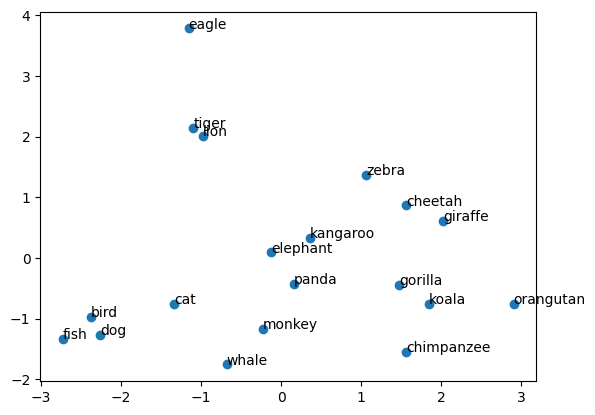

In [11]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

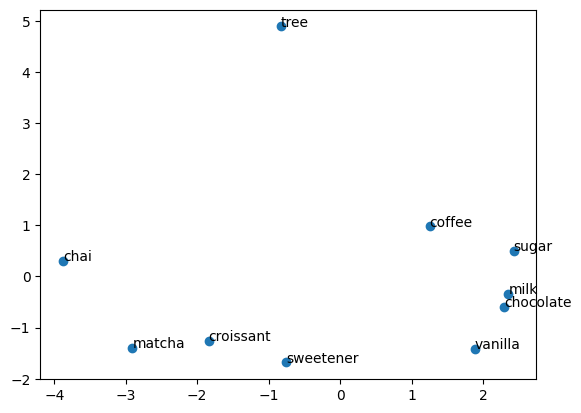

In [12]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
# yes it does make sense, we put "tree" as an outlier and it appears to be one in the plot.
# the ingredients are mostly clustered together too 
words=["coffee","matcha","chocolate","croissant","vanilla","sugar","chai","sweetener","milk","tree"]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


In [ ]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
# The relationship between the ingredients differ a bit, espeically chocolate being at a greater distance.
# All the words I would assume would be near eachother when you talk about them (chai, matcha, and croissant) are near eachother
# besides coffee...

# I assume the difference in the embedding space/coorelation is due to how people "talk" on twitter vs how they "talk" on wikipedia.

twitter_model= gensim.downloader.load("glove-twitter-100")

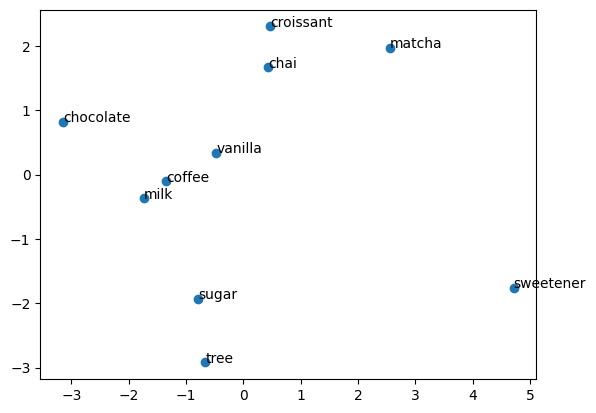

In [ ]:
words=["coffee","matcha","chocolate","croissant","vanilla","sugar","chai","sweetener","milk","tree"]

X=[twitter_model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

Part 3: Embedding reddit posts

In [14]:
import pandas as pd

In [15]:
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [ ]:
#using the code from project 1, clean the text and create a bag of words representation of the text

In [16]:
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [17]:
data['cleaned_text'] = data['text'].apply(clean)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])

In [20]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
# bow_df

In [ ]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

In [78]:
# the two subreddits are not separable in the embedding space.

In [44]:
labels = data['label'].values
# labels

In [23]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(bow_df)

In [46]:
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

In [47]:
pca_df["label"] = labels

In [48]:
colors = {'UIUC':'red', 'UMich':'blue'}

In [28]:
import numpy as np

In [49]:
unique_labels = np.unique(labels)
# unique_labels

In [30]:
import matplotlib.pyplot as plt

In [50]:
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))
# colors

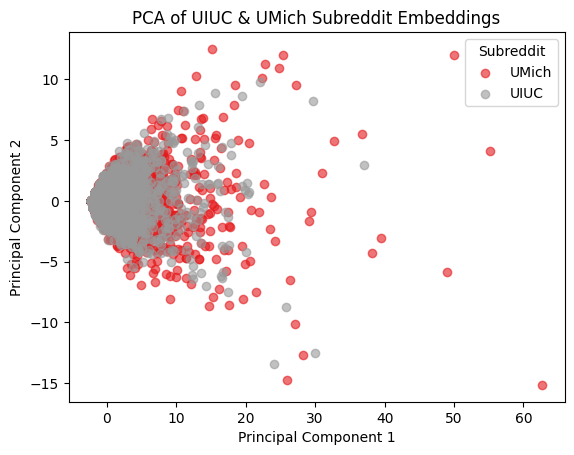

In [53]:
for i, label in enumerate(unique_labels):
    subset = pca_df[pca_df['label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], 
                label=label, color=colors[i], alpha=0.6)

plt.title('PCA of UIUC & UMich Subreddit Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.legend(title='Subreddit')
plt.legend(['UMich', 'UIUC'], title='Subreddit')
plt.show()

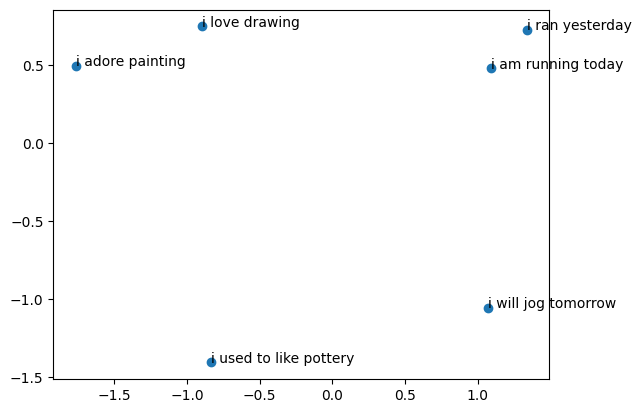

In [54]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [ ]:
#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

In [55]:
# Calculate average embeddings and keep valid indices
avg_embeddings = []
valid_indices = []

for idx, sentence in enumerate(data['cleaned_text']):
    embedding = avg_embedding(sentence, model)
    # Check for valid embeddings (not None and no NaNs)
    if embedding is not None and not np.isnan(embedding).any():
        avg_embeddings.append(embedding)
        valid_indices.append(idx)

# Convert list of valid embeddings to a numpy array
avg_embeddings = np.array(avg_embeddings)

# Check the shape of avg_embeddings
print(f"Shape of avg_embeddings: {avg_embeddings.shape}")

c:\Users\victo\anaconda3\envs\is310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\victo\anaconda3\envs\is310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Shape of avg_embeddings: (9290, 100)


In [56]:
# Ensure avg_embeddings is a 2D array
if avg_embeddings.ndim == 1:
    avg_embeddings = avg_embeddings.reshape(-1, 1)

# Perform PCA
pca = PCA(n_components=2)
try:
    X_pca = pca.fit_transform(avg_embeddings)
    print(f"PCA result shape: {X_pca.shape}")
except Exception as e:
    print(f"Error during PCA: {e}")

PCA result shape: (9290, 2)


In [57]:
# Filter the data based on valid indices
filtered_data = data.iloc[valid_indices].reset_index(drop=True)

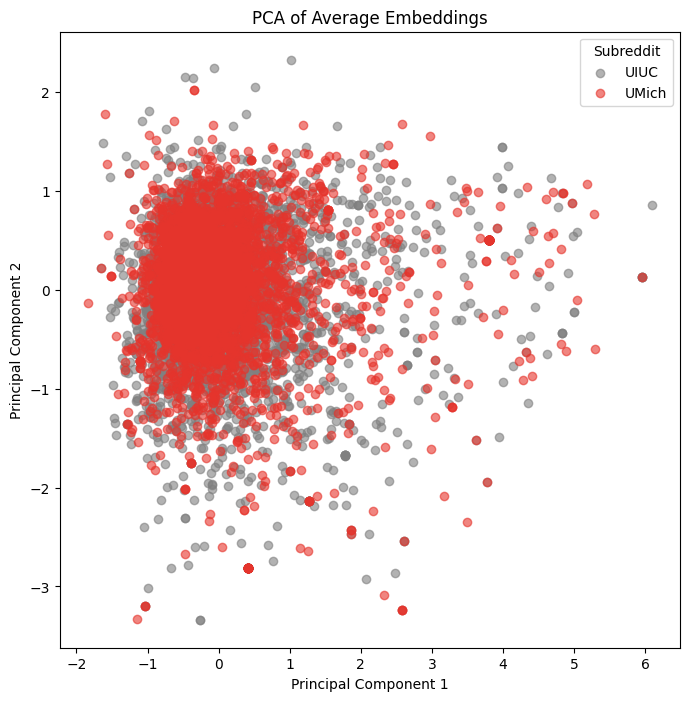

In [77]:
label_colors = {
    0: '#e6342c',
    1: 'grey'
}

plt.figure(figsize=(8, 8))

# Get the unique labels from the filtered data
unique_labels = filtered_data['label'].unique()

for label in unique_labels:
    # Create a mask for the current label
    indices = filtered_data['label'] == label
    # Plot the points with the specified color
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], 
                label=f'Label {label}', color=label_colors[label], alpha=0.6)

# Plot settings
plt.title('PCA of Average Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(['UIUC', 'UMich'], title='Subreddit')
plt.show()


Part 4: HuggingFace and BERT

In [ ]:
!pip install transformers

In [79]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [80]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [90]:
# Define a function to truncate long texts
def truncate_text(text, max_length=128):
    tokens = text.split()
    if len(tokens) > max_length:
        return " ".join(tokens[:max_length])
    return text

In [94]:
def classify_sentiment(text):
    try:
        # Truncate the text if too long
        truncated_text = truncate_text(text)
        return pipe(truncated_text)[0]['label']
    except Exception as e:
        # Skip if any error occurs
        return None

In [95]:
# Apply the function to each post and store the sentiment label
data['sentiment'] = data['cleaned_text'].apply(classify_sentiment)

In [98]:
final_df = data.dropna(subset=['sentiment'])

In [101]:
# Find and print the most common sentiment label
most_common_sentiment = final_df['sentiment'].value_counts().idxmax()
print(f"The most common sentiment is: {most_common_sentiment}")

The most common sentiment is: NEU


In [ ]:
"NEU stnading for neutral, POS for positive, and NEG for negative"

In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

# Yes I do agree that most of them are neutral by wayyy more. Then it goes to positive then negative.

In [ ]:
#is the UIUC or Michigan subreddit more negative?

In [119]:
final_df[(final_df['sentiment'] == 'NEG')&(final_df['label'] == 1)].shape[0] #uiuc

1023

In [118]:
final_df[(final_df['sentiment'] == 'NEG')&(final_df['label'] == 0)].shape[0] #michigan

1102

In [ ]:
#umich is a bit more negative, ofc :D